In [1]:
!pip install -q torch torchvision opencv-python


In [3]:
!pip install -q facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 749.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16

In [4]:
!pip install -q "pillow>=9.5.0,<11" # install a version greater than 9.5 but less than 11 to remain compatible
!pip install -q --upgrade torchvision facenet-pytorch # upgrade these packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

**1. Import modules**

In [ ]:
import os
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import pickle
from sklearn.neighbors import KNeighborsClassifier

**2. Apply Augmentation**

This script reads images from the /data/train directory, applies augmentation, and saves the augmented images.

In [ ]:
from torchvision import transforms
from PIL import Image
import os

# Suppress DecompressionBombWarning
Image.MAX_IMAGE_PIXELS = None  # Set to None to allow large images without warnings

# Paths
base_dir = '/content/drive/MyDrive/FaceRecognitionProject/data/'
train_dir = os.path.join(base_dir, 'train')  # Original train data
augmented_dir = os.path.join(base_dir, 'augmented_train')  # Augmented train data
os.makedirs(augmented_dir, exist_ok=True)

# Define augmentation pipeline
augmentation_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.RandomRotation(degrees=15),  # Random rotation within +/- 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Adjust brightness and contrast
    transforms.Resize((160, 160)),  # Resize to a consistent size
])

# Valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

# Apply augmentations
num_augmentations = 5  # Number of augmented images per original image

for label in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, label)
    if os.path.isdir(folder_path):  # Process only directories
        # Create corresponding folder in the augmented directory
        augmented_label_dir = os.path.join(augmented_dir, label)
        os.makedirs(augmented_label_dir, exist_ok=True)

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            # Skip directories and non-image files
            if not os.path.isfile(img_path) or not img_name.lower().endswith(valid_extensions):
                continue

            img = Image.open(img_path)

            # Ensure RGB mode
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Save original image in augmented folder
            img.save(os.path.join(augmented_label_dir, img_name))

            # Generate augmented images
            for i in range(num_augmentations):
                augmented_img = augmentation_pipeline(img)
                augmented_img.save(
                    os.path.join(augmented_label_dir, f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg")
                )

print(f"Augmented data saved in {augmented_dir}")


Augmented data saved in /content/drive/MyDrive/FaceRecognitionProject/data/augmented_train


In [ ]:
# Count images in each subfolder
for label in os.listdir(augmented_dir):
    folder_path = os.path.join(augmented_dir, label)
    if os.path.isdir(folder_path):  # Process only directories
        # Count valid image files
        image_count = sum(
            1 for img_name in os.listdir(folder_path)
            if img_name.lower().endswith(valid_extensions) and os.path.isfile(os.path.join(folder_path, img_name))
        )
        print(f"{label}: {image_count} images")


fidan: 300 images
leyla: 432 images
others: 465 images


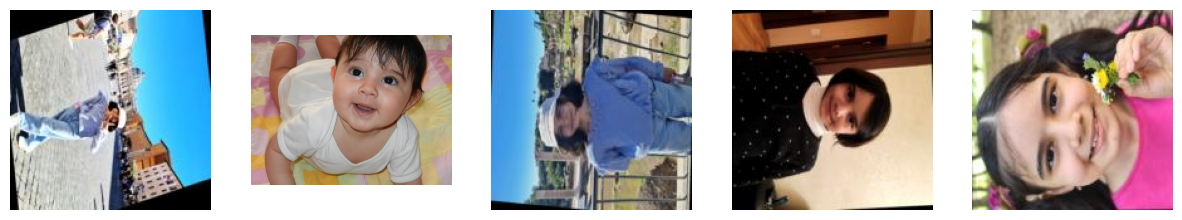

In [ ]:
# Visualize a few augmented images

import random
import matplotlib.pyplot as plt


label = "leyla"  # Change to any label you want to inspect
augmented_label_dir = os.path.join(augmented_dir, label)
augmented_images = os.listdir(augmented_label_dir)

fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i, img_name in enumerate(random.sample(augmented_images, 5)):
    img_path = os.path.join(augmented_label_dir, img_name)
    img = Image.open(img_path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()


**3. Train the k-NN classifier model**

In [ ]:
# Paths
base_dir = '/content/drive/MyDrive/FaceRecognitionProject/data/'
train_dir = os.path.join(base_dir, 'augmented_train')  # Path to augmented train data
embeddings_path = '/content/drive/MyDrive/FaceRecognitionProject/embeddings/train_embeddings.pkl'
model_path = '/content/drive/MyDrive/FaceRecognitionProject/embeddings/face_recognition_model.pkl'

In [ ]:
# Initialize face detection and embedding model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=False, device=device)  # Single face detection
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

  0%|          | 0.00/107M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)

In [ ]:
# Prepare training data
train_embeddings = []
train_labels = []

# Valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

print("Processing augmented training data...")

for label in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, label)
    if os.path.isdir(folder_path):  # Process only directories
        print(f"Processing folder: {label}")
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            # Skip non-image files
            if not img_name.lower().endswith(valid_extensions) or not os.path.isfile(img_path):
                continue

            img = Image.open(img_path)

            # Ensure RGB mode
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Detect face
            face = mtcnn(img)
            if face is not None:
                # Extract embedding
                embedding = resnet(face.unsqueeze(0).to(device)).detach().cpu().numpy().flatten()
                train_embeddings.append(embedding)
                train_labels.append(label)

print(f"Processed {len(train_embeddings)} images for training.")

Processing augmented training data...
Processing folder: fidan
Processing folder: leyla
Processing folder: others
Processed 511 images for training.


In [ ]:
# Save embeddings
with open(embeddings_path, 'wb') as f:
    pickle.dump({'embeddings': train_embeddings, 'labels': train_labels}, f)
print(f"Saved training embeddings to {embeddings_path}")

Saved training embeddings to /content/drive/MyDrive/FaceRecognitionProject/embeddings/train_embeddings.pkl


In [ ]:
# Train classifier
print("Training k-NN classifier...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_embeddings, train_labels)

Training k-NN classifier...


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Save the trained model
with open(model_path, 'wb') as f:
    pickle.dump(knn, f)
print(f"Saved classifier to {model_path}")

Saved classifier to /content/drive/MyDrive/FaceRecognitionProject/embeddings/face_recognition_model.pkl


**4. Test the model**

In [ ]:
import os
import torch
from PIL import Image
import pickle
from sklearn.metrics import classification_report
from torchvision import transforms
from facenet_pytorch import MTCNN, InceptionResnetV1

# Paths
base_dir = '/content/drive/MyDrive/FaceRecognitionProject/data/'
test_dir = os.path.join(base_dir, 'test')  # Path to test data organized by subdirectories
model_path = '/content/drive/MyDrive/FaceRecognitionProject/embeddings/face_recognition_model.pkl'

# Initialize face detection and embedding model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)  # Multi-face detection
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load the trained classifier
with open(model_path, 'rb') as f:
    knn = pickle.load(f)

# Prepare test data
test_embeddings = []
test_labels = []
photo_info = []  # Store photo paths and face indices for debugging

print("Processing test data...")

valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)
    if os.path.isdir(label_dir):  # Process only directories
        print(f"Processing folder: {label}")
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            if not img_name.lower().endswith(valid_extensions) or not os.path.isfile(img_path):
                continue

            img = Image.open(img_path)

            # Ensure RGB mode
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Detect all faces in the image
            boxes, _ = mtcnn.detect(img)
            if boxes is not None:
                for i, box in enumerate(boxes):
                    x1, y1, x2, y2 = map(int, box)
                    face = img.crop((x1, y1, x2, y2)).resize((160, 160))  # Align and resize face

                    # Check if face detection succeeded
                    if face is None:
                        print(f"Warning: No face detected in {img_name}, skipping...")
                        continue

                    # Convert the face to a tensor
                    face_tensor = transforms.ToTensor()(face).unsqueeze(0).to(device)
                    embedding = resnet(face_tensor).detach().cpu().numpy().flatten()

                    test_embeddings.append(embedding)
                    test_labels.append(label)  # Use the folder name as the ground truth label
                    photo_info.append((img_name, i))  # Track which photo and face index
            else:
                print(f"No faces detected in {img_name}")

print(f"Processed {len(test_embeddings)} faces from test data.")

# Predict labels for test embeddings
test_predictions = knn.predict(test_embeddings)

# Combine results for debugging
for (photo, face_idx), pred_label in zip(photo_info, test_predictions):
    print(f"Photo: {photo}, Face {face_idx + 1}: Predicted as {pred_label}")

# Evaluate performance
if test_labels:
    print("\nClassification Report:")
    print(classification_report(test_labels, test_predictions))


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Processing test data...
Processing folder: others
No faces detected in 20240928_193248.jpg
No faces detected in 1577942751547-995a7ef8-af9b-4475-b02b-1bdcaea5f5f5.jpg
No faces detected in IMG_20190720_150106.jpg
Processing folder: leyla
Processing folder: fidan
No faces detected in 20210606_174205.jpg
Processed 144 faces from test data.
Photo: 20240930_135720.jpg, Face 1: Predicted as leyla
Photo: 20240928_195232.jpg, Face 1: Predicted as leyla
Photo: 20240930_133833.jpg, Face 1: Predicted as others
Photo: 20240930_133833.jpg, Face 2: Predicted as fidan
Photo: 20240930_133833.jpg, Face 3: Predicted as fidan
Photo: 20240930_133833.jpg, Face 4: Predicted as leyla
Photo: 20240930_133833.jpg, Face 5: Predicted as fidan
Photo: 20240930_135718.jpg, Face 1: Predicted as others
Photo: 20240930_135718.jpg, Face 2: Predicted as leyla
Photo: 20240930_135718.jpg, Face 3: Predicted as others
Photo: 20240930_135718.jpg, Face 4: Predicted as fidan
Photo: 1577942844419-64641c07-9102-4427-860e-f12cfcfb

**4.1. Test on a multi-person photos**

In [3]:
import os
import torch
from PIL import Image
import pickle
from facenet_pytorch import MTCNN, InceptionResnetV1
from torchvision import transforms

# Paths
base_dir = '/content/drive/MyDrive/FaceRecognitionProject/data/'
multiperson_dir = os.path.join(base_dir, 'multiperson')  # Path to multi-person photos
model_path = '/content/drive/MyDrive/FaceRecognitionProject/embeddings/face_recognition_model.pkl'

# Initialize face detection and embedding model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)  # Multi-face detection
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load the trained classifier
with open(model_path, 'rb') as f:
    knn = pickle.load(f)

# Prepare data structures
test_embeddings = []
photo_info = []  # Store photo paths and face indices for debugging
predicted_results = []  # Store predictions for all faces

print("Processing multi-person photos...")

valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

for img_name in os.listdir(multiperson_dir):
    img_path = os.path.join(multiperson_dir, img_name)
    if not img_name.lower().endswith(valid_extensions) or not os.path.isfile(img_path):
        continue

    img = Image.open(img_path)

    # Ensure RGB mode
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Detect all faces in the image with confidence scores
    img_gray = img.convert('L')  # Convert to grayscale
    boxes, probs = mtcnn.detect(img) # Detect faces
    if boxes is not None:
        for i, (box, prob) in enumerate(zip(boxes, probs)):
            if prob < 0.88:  # Filter faces with confidence below 88%
                print(f"Skipping low-confidence face in {img_name} (confidence: {prob:.2f})")
                continue
            x1, y1, x2, y2 = map(int, box)
            face = img.crop((x1, y1, x2, y2)).resize((160, 160))  # Align and resize face

            # Check if face detection succeeded
            if face is None:
                print(f"Warning: No face detected in {img_name}, skipping...")
                continue

            # Convert the face to a tensor
            face_tensor = transforms.ToTensor()(face).unsqueeze(0).to(device)
            embedding = resnet(face_tensor).detach().cpu().numpy().flatten()

            # Predict label
            prediction = knn.predict([embedding])[0]
            predicted_results.append(prediction)

            # Store information for debugging
            photo_info.append((img_name, i, prediction))

            print(f"Photo: {img_name}, Face {i + 1}: Predicted as {prediction}")
    else:
        print(f"No faces detected in {img_name}")

print("\nMulti-person photo testing complete.")


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Processing multi-person photos...
Photo: 20210404_170854.jpg, Face 1: Predicted as others
Photo: 20210404_170854.jpg, Face 2: Predicted as fidan
Photo: 20210404_170854.jpg, Face 3: Predicted as others
Photo: 20210404_170854.jpg, Face 4: Predicted as leyla
Photo: 20210404_180147.jpg, Face 1: Predicted as fidan
Skipping low-confidence face in 20210404_180147.jpg (confidence: 0.73)
Skipping low-confidence face in 20210404_180147.jpg (confidence: 0.84)
Photo: 20210404_180147.jpg, Face 4: Predicted as leyla
Skipping low-confidence face in 20210404_180147.jpg (confidence: 0.82)
Photo: DSCN0631.JPG, Face 1: Predicted as leyla
Photo: DSCN0631.JPG, Face 2: Predicted as fidan
Photo: 20210404_180141.jpg, Face 1: Predicted as fidan
Photo: 20210404_180141.jpg, Face 2: Predicted as leyla
Skipping low-confidence face in 20210404_180141.jpg (confidence: 0.86)
Photo: 20210404_180141.jpg, Face 4: Predicted as leyla
Photo: DSCN0117.JPG, Face 1: Predicted as fidan
Photo: DSCN0117.JPG, Face 2: Predicted as